In [1]:
import shapefile as shp
import shapely
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
shapely.__version__
#shapely.geos_capi_version_string  
import geopandas as gpd

c:\Users\ceboigbe.adm\AppData\Local\miniconda3\envs\hurry_venv\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.11.2-CAPI-1.17.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\ceboigbe.adm\AppData\Local\Temp\ipykernel_12900\2823945272.py:10: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to S

In [2]:
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

In [3]:
#opening the vector map
shp_path =r"C:\Users\ceboigbe.adm\Documents\GitHub\atlantic-hurricane-dashboard\shapefiles\fiona err cone sample\20220921_1200Z_FIONA.err.shp" 
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

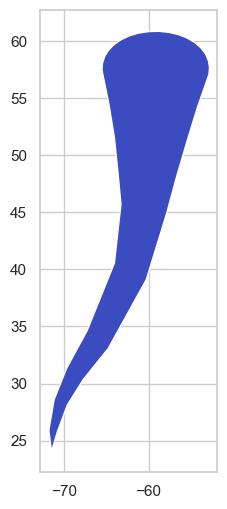

In [4]:
err1= gpd.read_file(shp_path)
err1.plot(cmap= "coolwarm")
plt.show()

In [5]:
data_path= r"C:\Users\ceboigbe.adm\Documents\GitHub\atlantic-hurricane-dashboard\shapefiles\atlantic_canada_boundary.shp"
atlantic_data=gpd.read_file(data_path)

can_hurricane_boundary= r"C:\Users\ceboigbe.adm\Downloads\Hurricane_Dashboard\files\hurricane_response_boundary.shp"
can_hurricane=gpd.read_file(can_hurricane_boundary)

In [6]:
intersect_overlay_1= gpd.overlay(atlantic_data, err1, how='intersection')
intersect_overlay= gpd.overlay(intersect_overlay_1, can_hurricane, how='intersection')
intersect_overlay.bounds

,minx,miny,maxx,maxy
0,-65.594193,40.400075,-52.803038,60.016013


Text(0.5, 1.0, 'Testing')

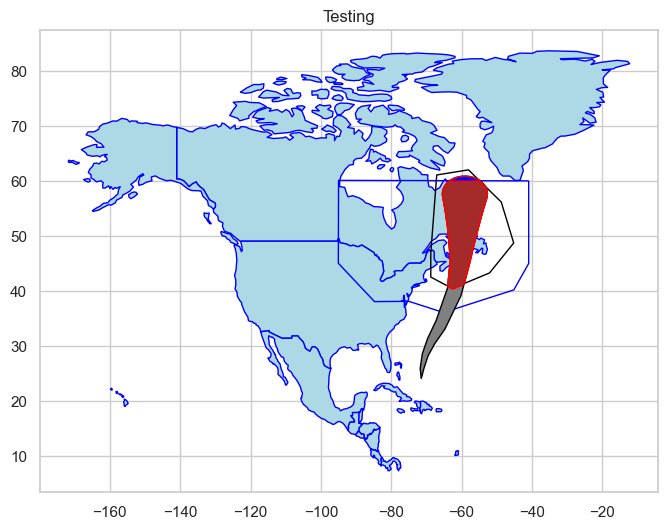

In [7]:
#get built in dataset
world_data= gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

#plot world map
axis= world_data[world_data.continent=="North America"].plot(
    color="lightblue",edgecolor= "blue"
)

#shp_can.plot(ax=axis, color= "grey")

#plotting_data
#err1.plot(ax=(shp_can.plot(ax=axis, color= "grey")), color= "grey")
can_hurricane.plot(ax= axis, edgecolor= "blue",color="None")
atlantic_data.plot(ax= axis, edgecolor= "black",color="None")
err1.plot(ax= axis, edgecolor= "black",color="grey")
intersect_overlay_1.plot(ax= axis, edgecolor= "red",color="blue")
intersect_overlay.plot(ax= axis, edgecolor= "red",color="brown")
plt.title("Testing")

In [9]:
# Getting bounds for the spatial boundary
boundary= intersect_overlay.bounds
boundary_list= boundary.values.tolist()
list_for_dict= boundary_list[0]
original_dict= {
    "min_lon": "" ,
    "max_lon":"",
    "min_lat": "",
    "max_lat": "",
   
    
}
start_of_the_storm= "2022-09-15T00:00:00Z"
time_list = [start_of_the_storm]
time_dict= { "max_time>=":"",}

#other_stuff= {"standard_name": "wind_speed",}

time_boundaries= dict(zip(time_dict, time_list))
spatial_boundaries = dict(zip(original_dict, list_for_dict))

time_boundaries

{'max_time>=': '2022-09-15T00:00:00Z'}

In [10]:
boundary= spatial_boundaries | time_boundaries
boundary

{'min_lon': -65.59419274163918,
 'max_lon': 40.4000749668373,
 'min_lat': -52.80303805526239,
 'max_lat': 60.01601301432785,
 'max_time>=': '2022-09-15T00:00:00Z'}

In [12]:
from erddapy import ERDDAP
from erddapy.doc_helpers import show_iframe
e = ERDDAP(
  server="https://cioosatlantic.ca/erddap",
  protocol="tabledap",)

kw= boundary

search_url = e.get_search_url(response="csv", **kw)
search = pd.read_csv(search_url)
stations_in_boundary = search["Dataset ID"].values
print (stations_in_boundary)

len(stations_in_boundary)

['cna_werc_weather_10-min_avg' 'cna_werc_sustained_wind_2-min_avg'
 'coastal_action_7471_9460_c025' 'SMA_bay_of_exploits'
 'SMA_bay_of_islands' 'SMA_bonavista' 'SMA_port_aux_basques'
 'SMA_port_aux_basqes_wharf' 'cmar_c5a5_c41c_2090' 'cmar_fca0_698a_0716'
 'cmar_8f10_9c65_13cb' 'coast-of-bays-hydrographic-2009-2013' 'eb3n-uxcb'
 'x9dy-aai9' 'a9za-3t63' 'eda5-aubu' 'adpu-nyt8' 'v6sa-tiit' 'mq2k-54s4'
 'SMA_corner_brook_wharf' 'cna_werc_weather_daily_avg'
 'FORCE_Mar2018_ADCP_Currents' 'FORCE_Mar2018_ADCP_Waves'
 'force_meteorological_tower' 'SMA_Fortune_Bay_Buoy'
 'wsp_grand_banks_waypoint3_wave_buoy' 'SMA_halifax'
 'SMA_halifax_fairview' 'SMA_halifax_anemometer1' 'SMA_halifax_pier9c'
 'SMA_head_of_placentia_bay-come_by_chance_point' 'SMA_Holyrood_Buoy2'
 'SMA_holyrood_wharf' 'SMA_bay_of_exploits_wharf' 'SMA_manolis_buoy'
 'bio_annual_ice_forecast_hydrographic_survey_st_lawrence_ctd'
 'maritimes_region_atlantic_zone_monitoring_program_rosette_vertical_profiles'
 'atlantic_zone_off_shelf

58

### Functions


In [13]:
#filter_by_date_list is initialized to an empty list at start of code
#This filters through the metadata of each data id in the list to check if data is within
#scope required.
#It returns a new list of data_id's that have data that falls within our required scope
def filter_by_date(min_time, data_id, filter_by_date_list):
    info_url = e.get_info_url(dataset_id=data_id, response="csv")
    info= pd.read_csv(info_url)
    time_attribute_list= ["time_coverage_end"]
    time_end_df = info[info['Attribute Name'].isin(time_attribute_list)]


    time_end_list= time_end_df["Value"].values.tolist()
    time_end_list
    if time_end_list[0]>= min_time:
        filter_by_date_list.append(data_id)

    return filter_by_date_list



# This produces a filtered list of the variable names, this goes through each data set id 
# to produce a list used as input for the check_for_variable_name function
# 
def retrieve_attr_from_metadata(data_id):
    info_url = e.get_info_url(dataset_id=data_id, response="csv")
    info_df= pd.read_csv(info_url)
    column_search_words= ["variable"]
    filtered_df = info_df[info_df['Row Type'].isin(column_search_words)]
    filtered_list= filtered_df["Variable Name"].values.tolist()
    return filtered_list


#dict_with_constraints is initialized to an empty dict at start of code
#this code checks for the variable list and compares it with the list of 
#variable names that we are interested in and saves the intersection in a list called checklist
#It checks if the list has more than 3 values (longitude, latitude, and time) and pairs it in
#a dictionary with the data_id to be retrieved for variables that can be set 
#as e.variables and used to retrieve data in get request
def check_for_variable_name(filtered_list, variable_name_list, dict_with_variables, data_id):
    #check_list= list(set(filtered_list).intersection(variable_name_list))
    check_list= [value for value in variable_name_list if value in filtered_list]
    if len(check_list)> 3:
        dict_with_variables.__setitem__(data_id, check_list)
    else:
        dict_with_variables.__setitem__(data_id, "empty")
    
    
    return dict_with_variables
#work on editing this function so if the station doesnt have any of the variable we need, it skips it
# try using a try except block that if the key/value pair is "empty", it skips over that station



# result dict should be initialized to 0
# This pulls data for each data id and returns a dictionary with the data_id and 
# the data requested.
def pull_data(data_id, dict_with_variables, result_dictionary):
    time_constraint= {'time>=': '2022-09-15T00:00:00Z',
                      'time<=': '2022-09-30T00:00:00Z'}
    
    if dict_with_variables[data_id]== "empty":
        return
    else:
        urls= e.get_download_url(dataset_id= data_id, 
                                 variables=dict_with_variables[data_id], 
                                 constraints=time_constraint)
    csv_urls= urls.replace("html", "csv")
    urls_df= pd.read_csv(csv_urls)
    
    #time_constraint= {"min_time": '2022-09-15T00:00:00Z'}- NOT USEABLE
    

    
    
    result_dictionary.__setitem__(data_id, urls_df)

    return result_dictionary







### Variable List

In [14]:
variable_list= ['latitude', 'longitude', 'time', 'wind_bearing',
 'wind_dir',
 'wind_dir2_avg',
 'wind_dir_avg',
 'wind_dir_deci_deg',
 'wind_dir_sd',
 'wind_direction',
 'wind_from_direction',
 'wind_from_direction_15min_average',
 'wind_max',
 'wind_min',
 'wind_scalar_avg',
 'wind_spd2_avg',
 'wind_spd2_max',
 'wind_spd_avg',
 'wind_spd_gust',
 'wind_spd_gust_dir',
 'wind_spd_max',
 'wind_spd_max_dir',
 'wind_spd_sustained',
 'wind_speed',
 'wind_speed_15min_average',
 'wind_speed_15min_max',
 'wind_speed_15min_median',
 'wind_speed_2min_max',
 'average_wave_height',
 'max_wave_height',
 'mean_wave_period',
 'peak_wave_period',
 'satacs0020_acs_a_wavelengths',
 'satacs0020_acs_a_wavelengths_data',
 'satacs0020_acs_aref_wavelengths',
 'satacs0020_acs_aref_wavelengths_data',
 'satacs0020_acs_asig_wavelengths',
 'satacs0020_acs_asig_wavelengths_data',
 'satacs0020_acs_c_wavelengths',
 'satacs0020_acs_c_wavelengths_data',
 'satacs0020_acs_cref_wavelengths',
 'satacs0020_acs_cref_wavelengths_data',
 'satacs0020_acs_csig_wavelengths',
 'satacs0020_acs_csig_wavelengths_data',
 'satfl30338_phyto_wavelengths',
 'satfl30338_phyto_wavelengths_data',
 'satfl30338_ref_phyto_wavelengths',
 'satfl30338_ref_phyto_wavelengths_data',
 'sathed0211_es_wavelengths',
 'sathed0211_es_wavelengths_data',
 'sathse0211_es_wavelengths',
 'sathse0211_es_wavelengths_data',
 'satstx0016_aux_wavelengths',
 'satstx0016_aux_wavelengths_data',
 'satvsf0113_blue_wavelengths',
 'satvsf0113_blue_wavelengths_data',
 'satvsf0113_green_wavelengths',
 'satvsf0113_green_wavelengths_data',
 'satvsf0113_red_wavelengths',
 'satvsf0113_red_wavelengths_data',
 'sea_surface_wave_maximum_period',
 'sea_surface_wave_significant_height',
 'significant_wave_height',
 'significant_wave_period',
 'wave_dir_avg',
 'wave_ht_max',
 'wave_ht_sig',
 'wave_mean_direction',
 'wave_mean_directional_spread',
 'wave_mean_period',
 'wave_peak_direction',
 'wave_peak_directional_spread',
 'wave_peak_period',
 'wave_period_max',
 'wave_significant_height',
 'wave_spread_avg',
 'air_pres',
 'air_pressure',
 'air_pressure_avg',
 'air_pressure_raw',
 'prespr01',
 'pressure_dbar',
 'qpres_01',
 'satacs0020_acs_pressure',
 'satctd7229_pres',
 'sea_water_pressure',
 'water_pressure']

## Empty dicts and Lists

In [15]:
filter_by_date_list= []
dict_with_variables= {}
result_dict2= {}
result_dictionary= {}

In [16]:
for station_data_id in stations_in_boundary:
    time_filtered_list= filter_by_date(start_of_the_storm, 
                   station_data_id, 
                   filter_by_date_list)


In [17]:
for data_id in time_filtered_list:
    data_id_variables_list= retrieve_attr_from_metadata(data_id)
    variable_dict= check_for_variable_name(data_id_variables_list, 
                            variable_list, 
                            dict_with_variables, 
                            data_id)
    final_result_dict= pull_data(data_id, 
                                 dict_with_variables, 
                                 result_dict2)


In [18]:
final_result_dict

{'SMA_port_aux_basques': Empty DataFrame
 Columns: [wind_spd2_avg, time, wind_spd2_max, wave_period_max, wave_spread_avg, wave_dir_avg, wave_ht_sig, air_pressure_avg, wind_dir2_avg, latitude, wind_spd_avg, wind_dir_avg, wind_spd_max, longitude, wave_ht_max]
 Index: [],
 'SMA_port_aux_basqes_wharf': Empty DataFrame
 Columns: [time, latitude, wind_spd_avg, wind_dir_avg, wind_spd_max, longitude]
 Index: [],
 'force_meteorological_tower':        wind_speed_15min_median                  time  wind_speed_15min_max  \
 0                     6.879599  2022-09-15T00:09:47Z              9.956799   
 1                     6.958000  2022-09-15T00:24:47Z             11.622800   
 2                     5.233200  2022-09-15T00:39:47Z              9.486400   
 3                     4.998000  2022-09-15T00:54:47Z              8.349600   
 4                     4.067000  2022-09-15T01:09:52Z              6.605200   
 ...                        ...                   ...                   ...   
 16917   